## Данные:
Датасет просулшанных альбомов одного из музыкальных сообществ Бразилии\
album - альбом\
acousticness - акустичность\
danceability - танцевальность\
energy - энергия\
instrumentalness - инструментальность\
liveness - живость\
loudness - громкость\
speechiness	- речёвость\
tempo - темп\
valence	- валентность эмоций \
duration_ms	time_signature	- длительность в мс\
Nota - Оценка\
Ano de Lançamento - год выпуска	\
País - Страна

## Задачи:
Определить топ-3 страны происхождения альбомов\
Определить топ-3 года выпуска альбомов\
Определить минимальную, среднюю и максимальную продолжительность прослушивания\
Показать распределение темпа по годам\
Провести A/B тест распределения темпа среди альбомов с хорошими оценками и остальными альбомами\
Провести A/B тест распределения речевости среди альбомов из Бразилии и остальными альбомами\
Рассчитать коэф. корреляции между показателем энергии и оценкой альбома\
Рассчитать коэф. корреляции между показателем валентности и оценкой альбома

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import scipy.stats as ss
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('../Missed migrabts/mysongs_test.csv')

In [3]:
df = df.drop(columns = 'Unnamed: 0')

In [4]:
df.duration_ms =  pd.to_datetime(df.duration_ms, unit = 'ms')
df.duration_ms = df['duration_ms'].dt.strftime('%M:%S')
df = df.rename(columns = {'duration_ms':'duration_min'})

In [5]:
df.head()

,album,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_min,time_signature,Nota,Ano de Lançamento,País
0,The Black Parade,0.106689,0.383714,0.801571,0.001833,0.208550,-4.228071,0.079036,138.339214,0.360000,03:42,3.928571,9.500,2006,EUA
1,An Evening With Silk Sonic,0.053501,0.662400,0.611200,0.000079,0.237810,-9.090100,0.057100,116.022300,0.662100,03:38,4.000000,9.500,2021,EUA
2,A Tábua de Esmeralda,0.545583,0.631583,0.570500,0.005155,0.194017,-13.686333,0.044667,123.820750,0.913917,03:21,3.916667,9.289,1974,Brasil
3,By The Way,0.051219,0.522833,0.826667,0.000690,0.186006,-3.970167,0.060567,120.965389,0.396167,04:15,4.000000,9.200,2002,EUA
4,Entren Los Que Quieran,0.333014,0.615000,0.721414,0.027082,0.221707,-7.195429,0.127800,115.417857,0.612914,03:45,3.857143,9.167,2010,Porto-Rico


In [6]:
df.groupby('País', as_index = False).agg({'album':'count'}).sort_values('album', ascending = False).head(3)
#ТОП-3 страны происхождения альбомов

,País,album
6,EUA,90
2,Brasil,46
19,UK,20


In [7]:
df.groupby('Ano de Lançamento', as_index = False).agg({'album':'count'}).sort_values('album', ascending = False).head(3)
#ТОП-3 года выпуска альбомов по колличеству раз прослушанных сообществом

,Ano de Lançamento,album
45,2019,15
43,2017,10
47,2021,10


In [53]:
{'Min Duration' : pd.to_datetime(df.duration_min).min().strftime('%H:%M'), 
'Mean Duration' : pd.to_datetime(df.duration_min).mean().strftime('%H:%M'),
'Max Duration' : pd.to_datetime(df.duration_min).max().strftime('%H:%M')}
#Минимальная, средняя и максимальнын продолжительности прослушивания альбомов в минутах

{'Min Duration': '01:22', 'Mean Duration': '03:49', 'Max Duration': '21:09'}

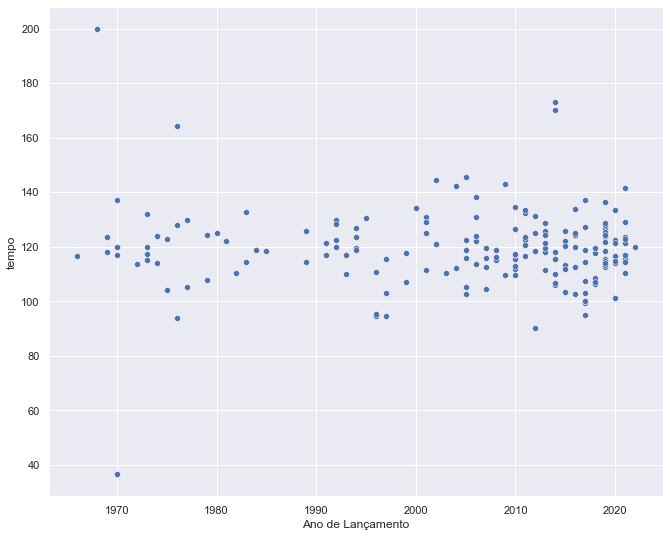

In [59]:
sns.scatterplot(df['Ano de Lançamento'], df.tempo)
sns.set(rc={'figure.figsize':(11,9)})
#Распределение темпа музыкальных альбомов по годам выпуска

### По данному граффику можно сделать вывод что в основном темп среди альбомов распределен в диапазоне 110 - 140, при чем есть выбросы как в большую так и в меньшую сторону

In [10]:
df.Nota = round(df.Nota, 1)
#Округелние Оценки до одного знака

<AxesSubplot:xlabel='danceability', ylabel='Density'>

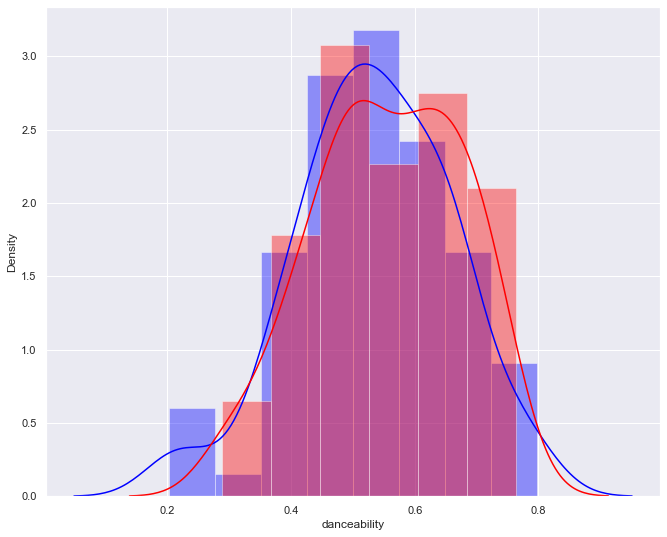

In [61]:
sns.distplot(df.query("Nota < 8").danceability, color = 'blue')
sns.distplot(df.query("Nota > 8").danceability, color = 'red')
#Распределение метрики танцевальности среди альбомов с оценкой выше и ниже 8

In [12]:
{'Average Dancebility of albums with Nota < 8': df.query("Nota < 8").danceability.mean(), 'Average Dancebility of albums with Nota > 8': df.query("Nota > 8").danceability.mean()}

{'Average Dancebility of albums with Nota < 8': 0.5332298674039054,
 'Average Dancebility of albums with Nota > 8': 0.5562518654920579}

### Средняя танцевальность альбомов с оценкой >8 выше на 5% чем танцевальность альбомов с оценкой <8. Выясним статически значимы ли эти различия с помощью A/B теста

In [13]:
{'<8': ss.shapiro(df.query("Nota < 8").danceability), '>8': ss.shapiro(df.query("Nota > 8").danceability)}
#Данные распределены нормально в обоих распределениях. Тест шапиро это подтверждает. 
#Значит для теста следует использовать T-критерий Стьюдента

{'<8': ShapiroResult(statistic=0.9851793050765991, pvalue=0.4084910452365875),
 '>8': ShapiroResult(statistic=0.9741335511207581, pvalue=0.11301808059215546)}

In [14]:
ss.ttest_ind(df.query("Nota < 8").danceability, df.query("Nota > 8").danceability)

Ttest_indResult(statistic=-1.2078435050378502, pvalue=0.22883585845640297)

### По результатам T-статистики = -1.2078435050378502, pvalue = 0.223, можно интерпретировать что нулевая гипотеза о равенстве средних не отклонена, статистически значимых различий обнаружить не удалось, а значит танцевальность не оказывает влияние на оценку альбомов в диапазоне оценок <8 - >8

In [35]:
df.groupby('País').agg({'Nota':'mean'}).sort_values('Nota', ascending = False)
#Рейтинг стран происхождения альбомов по средней оценке

,Nota
País,
"UK, Austrália e EUA",8.800000
Wales (UK),8.700000
Armênia,8.700000
Irlanda / EUA,8.600000
Coréia,8.400000
Irlanda,8.400000
Espanha,8.300000
França,8.250000
Ireland,8.200000


In [43]:
{'Other countries speechness mean:' : df.query("País != 'Brasil'").speechiness.mean(), 'Brasil speechness mean:' : df.query("País == 'Brasil'").speechiness.mean()}

{'Other countries speechness mean:': 0.08653219990127362,
 'Brasil speechness mean:': 0.11258591815443335}

### Ср. уровень речевости альбомов Бразилии, выше чем ср. уровень речевости альбомов из остального мира на 30%. Выясним статически значимы ли эти различия

<AxesSubplot:xlabel='speechiness', ylabel='Density'>

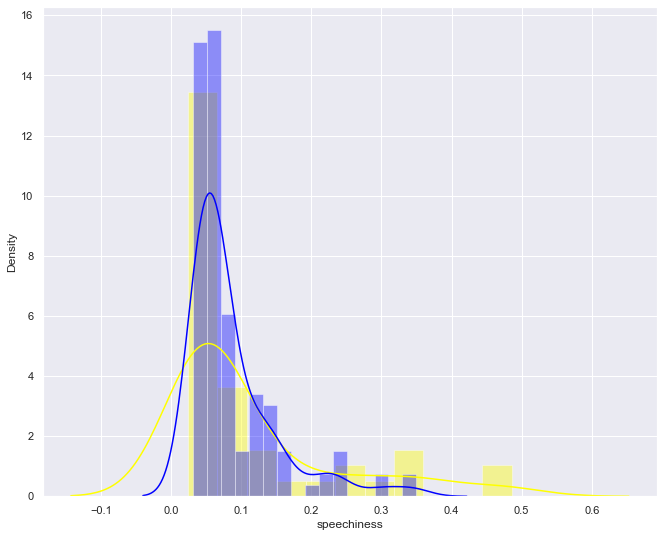

In [62]:
sns.distplot(df.query("País == 'Brasil'").speechiness, color = 'yellow')
sns.distplot(df.query("País != 'Brasil'").speechiness, color = 'blue')
#Распределения уровня речевости альбомов из Бразилии (желтый) и остального мира (синий)

In [48]:
{'Other world': ss.shapiro(df.query("País != 'Brasil'").speechiness), 'Brasil': ss.shapiro(df.query("País == 'Brasil'").speechiness)}
#Оба сета данных распределены ненормально. Соотвественно для теста выбираю U-критерий Стьюдента

{'Other world': ShapiroResult(statistic=0.7465658187866211, pvalue=7.239005131009363e-14),
 'Brasil': ShapiroResult(statistic=0.6949820518493652, pvalue=1.7610322089467445e-08)}

In [49]:
ss.mannwhitneyu(df.query("País != 'Brasil'").speechiness, df.query("País == 'Brasil'").speechiness)

MannwhitneyuResult(statistic=3244.0, pvalue=0.5424977512755047)

### С результатом U-статистики 3244б pvalue = 0.54, можно интепретировать что нулевая гипотеза о равенстве средних не была опровергнута, а значит статичтически значимая разница между речевостью альбомов из Бразилии и остального мира не подтверждена

<AxesSubplot:xlabel='Nota', ylabel='energy'>

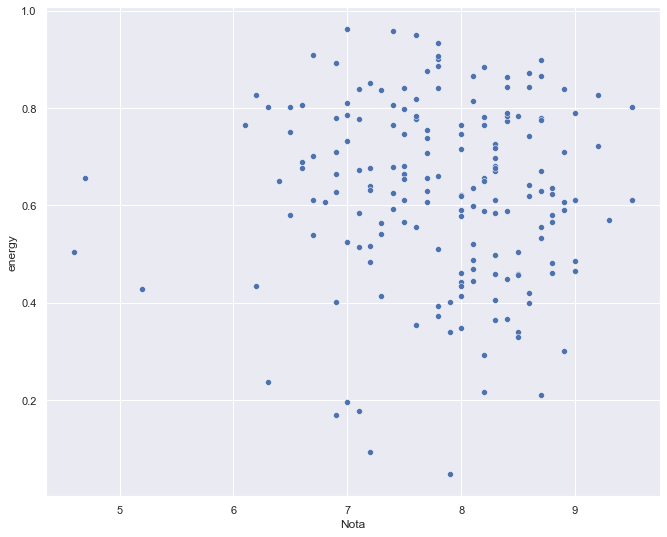

In [63]:
sns.scatterplot(df.Nota, df.energy)
#Распределение показателя энергии по оценкам альбомов

In [56]:
ss.pearsonr(df.Nota, df.energy)

(-0.03250741863341241, 0.665750955032847)

### Коэф. корреляции = -0.0325, pvalue = 0.665. Корреляция между значениями энергии и оценкой альбома не обнаружена

<AxesSubplot:xlabel='Nota', ylabel='valence'>

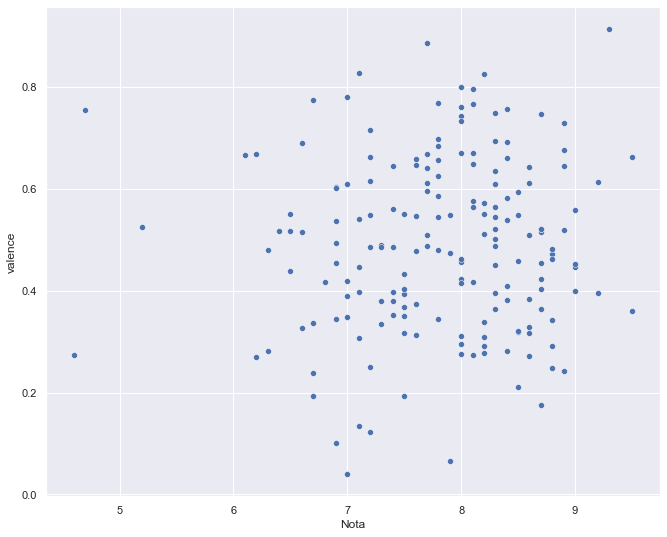

In [64]:
sns.scatterplot(df.Nota, df.valence)
#Распределение показателя валентности по оценкам альбомов

In [58]:
ss.pearsonr(df.Nota, df.valence)

(0.0610264202551045, 0.4170702585509589)

### Коэф. корреляции = 0.061, pvalue = 0.417. Корреляция между значениями валентности и оценкой альбома не обнаружена